<a href="https://colab.research.google.com/github/felixzhao/stat501-project/blob/main/notebooks/V6_FZ_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/pre_process_round_1"

Mounted at /content/drive
 01_selected_data.csv			 04_preprocessed_full_data.csv
 02_almost_complete_data.csv		 04_preprocessed_full_data.gsheet
 02_almost_complete_data.gsheet		 citi_agg_start_end_reg.csv
 03_full_data.csv			 citi_agg_texts.csv
 03_full_data.gsheet			 citi_agg_texts.gsheet
'04_preprocessed_full_data (1).gsheet'	 start_end_registrations.csv
'04_preprocessed_full_data (2).gsheet'	 start_end_registrations_wide.csv


# load df

In [3]:
raw_path = '/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/pre_process_round_1/04_preprocessed_full_data.csv'

In [4]:
df = pd.read_csv(raw_path, low_memory=False, index_col=False)

## info

In [5]:
print(len(df.columns))
df.columns

56


Index(['citizenId', 'hadAdvisory', 'age', 'citizenHeight', 'diabetes',
       'stress', 'noIllnesses', 'activePrevious30Days', 'daysOnProgram',
       'receivedAdviceCount', 'advicesWithVideoPercent',
       'receivedMessageCount', 'sentMessageCount', 'hasEverHadActiveAgreement',
       'hasActiveAdvisory', 'hasEndedAdvisory', 'hasEverHadWeightGoal',
       'hasEverHadActivityGoal', 'hasEverHadDietGoal', 'hasEverHadLifeGoal',
       'hasEverHadStepsGoal', 'goalsSet', 'advisorId', 'ALCOHOL',
       'BLOOD_PRESSURE', 'BLOOD_SUGAR', 'CIGARETTES', 'DIET_RULES', 'EXERCISE',
       'FASTING_BLOOD_SUGAR', 'LIFE_RULES', 'MEDICINE', 'MOOD', 'PAIN',
       'SLEEP', 'STEPS', 'WAIST_HIP', 'WEIGHT', 'count_intervention',
       'count_autogenerated', 'count_withvideo', 'min_messagetext_length',
       'avg_messagetext_length', 'max_messagetext_length', 'BMIClass_Normal',
       'BMIClass_Obesity 1', 'BMIClass_Obesity 2', 'BMIClass_Obesity 3',
       'BMIClass_Pre-obese', 'BMIClass_Underweight', 'cl

In [6]:
print(df.apply(lambda col: col.unique()))

citizenId                             [955397, 955420, 957973, 964298, 965126, 96324...
hadAdvisory                                     [0.139253230867343, -7.161594730320519]
age                                   [-0.1071102919504813, -0.6868960905614955, -1....
citizenHeight                         [1.3690669300191864, -0.2327850252955064, -1.1...
diabetes                                      [-0.2397495336137125, 4.1596544081979125]
stress                                         [-0.1287447519427193, 7.746142575220283]
noIllnesses                                   [0.4370772059396547, -2.2816911767697223]
activePrevious30Days                          [-0.4933586542689019, 2.0214000417961957]
daysOnProgram                         [-1.4597529198724062, -1.0587741421294072, -1....
receivedAdviceCount                   [-1.6891608073320534, -0.9319270740777412, -0....
advicesWithVideoPercent               [-1.0330165872025718, -0.8964470311855172, -0....
receivedMessageCount            

In [7]:
df.describe(include='all')

,citizenId,hadAdvisory,age,citizenHeight,diabetes,stress,noIllnesses,activePrevious30Days,daysOnProgram,receivedAdviceCount,...,BMIClass_Obesity 2,BMIClass_Obesity 3,BMIClass_Pre-obese,BMIClass_Underweight,closeReason_COMPLETED,closeReason_INTERVENTION_COMPLETED,closeReason_OTHER,birth_MAYBE,birth_NO,birth_YES
count,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,...,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02
mean,9.784870e+05,-3.872167e-16,2.710517e-16,-1.539187e-15,5.808251e-17,8.107351e-17,7.744335e-17,6.534283e-17,-1.113248e-16,7.744335e-17,...,4.840209e-17,6.776293e-17,4.840209e-17,6.776293e-17,-7.502325e-17,7.744335e-17,5.808251e-17,5.324230e-17,4.840209e-17,-3.872167e-17
std,6.679062e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,8.103590e+05,-7.161595e+00,-1.614553e+00,-8.509020e+00,-2.397495e-01,-1.287448e-01,-2.281691e+00,-4.933587e-01,-1.551870e+00,-2.362257e+00,...,-3.190986e-01,-2.397495e-01,-6.703470e-01,-5.219958e-02,-8.396728e-01,-5.219958e-02,-3.589967e-01,-2.700004e-01,-2.925150e-01,-1.609646e+00
25%,9.369740e+05,1.392532e-01,-4.549818e-01,-6.332480e-01,-2.397495e-01,-1.287448e-01,4.370772e-01,-4.933587e-01,-9.720760e-01,-8.477900e-01,...,-3.190986e-01,-2.397495e-01,-6.703470e-01,-5.219958e-02,-8.396728e-01,-5.219958e-02,-3.589967e-01,-2.700004e-01,-2.925150e-01,-1.609646e+00
50%,9.865620e+05,1.392532e-01,-1.071103e-01,3.419030e-02,-2.397495e-01,-1.287448e-01,4.370772e-01,-4.933587e-01,1.008131e-01,3.301291e-01,...,-3.190986e-01,-2.397495e-01,-6.703470e-01,-5.219958e-02,-8.396728e-01,-5.219958e-02,-3.589967e-01,-2.700004e-01,-2.925150e-01,6.195618e-01
75%,1.022040e+06,1.392532e-01,1.248040e-01,7.016286e-01,-2.397495e-01,-1.287448e-01,4.370772e-01,-4.933587e-01,9.352825e-01,8.349516e-01,...,-3.190986e-01,-2.397495e-01,1.487700e+00,-5.219958e-02,1.187695e+00,-5.219958e-02,-3.589967e-01,-2.700004e-01,-2.925150e-01,6.195618e-01
max,1.192205e+06,1.392532e-01,3.951390e+00,2.703944e+00,4.159654e+00,7.746143e+00,4.370772e-01,2.021400e+00,1.525913e+00,1.508048e+00,...,3.125289e+00,4.159654e+00,1.487700e+00,1.910504e+01,1.187695e+00,1.910504e+01,2.777951e+00,3.693606e+00,3.409313e+00,6.195618e-01


# DBScan

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler

# Separate 'citizenId'
citizen_ids = df['citizenId']
X = df.drop('citizenId', axis=1)

# # Define the parameter grid
# param_grid = {
#     'eps': np.linspace(0.1, 1, 10),  # Adjust the range and step as needed
#     'min_samples': range(1, 10)  # Adjust the range and step as needed
# }

# # Grid search
# best_score = -1
# best_params = None

# X_scaled = StandardScaler().fit_transform(X)

# for params in ParameterGrid(param_grid):
#     dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
#     clusters = dbscan.fit_predict(X_scaled)

#     # We'll use silhouette score for evaluation
#     # Note: Silhouette score requires more than one cluster to be present
#     if len(np.unique(clusters)) > 1:
#         score = silhouette_score(X_scaled, clusters)
#         if score > best_score:
#             best_score = score
#             best_params = params

# print(f"Best parameters: {best_params}")
# print(f"Best silhouette score: {best_score}")

# Apply DBSCAN
dbscan = DBSCAN(eps=20, min_samples=10)
clusters = dbscan.fit_predict(X)

# Check the unique cluster labels
print(np.unique(clusters))

# Plot the results
# plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
# plt.title('DBSCAN Clustering')
# plt.show()


[-1  0]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits  # Just for demonstration purposes

# Load or prepare your data
# For demonstration, I'm using the digits dataset which has 64 features
data, labels = load_digits(return_X_y=True)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(data)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis', s=60)
plt.colorbar()
plt.title('t-SNE visualization')
plt.show()


# KMeans

In [25]:
def cluster_kmeans(n_clusters):
    # Separate 'citizenId'
    ids = df['citizenId']
    X = df.drop('citizenId', axis=1)

    # It's often a good idea to scale the data for KMeans
    X_scaled = StandardScaler().fit_transform(X)

    # Apply KMeans clustering
    # n_clusters = 4
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(X_scaled)
    df['cluster'] = kmeans.fit_predict(X_scaled)

    # Apply t-SNE for visualization
    tsne = TSNE(n_components=2, random_state=42)
    data_tsne = tsne.fit_transform(X_scaled)

    # Plot the results
    plt.figure(figsize=(10, 8))
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters, cmap='viridis', s=60)
    plt.colorbar()
    plt.title('KMeans clustering visualized with t-SNE')
    plt.show()

    # Print cluster number and corresponding IDs
    clusters = []
    for cluster_num in range(n_clusters):
        cluster_ids = ids[df['cluster'] == cluster_num].tolist()
        print(f"Cluster {cluster_num}: {cluster_ids}")
        clusters.append(cluster_ids)
    return clusters

2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


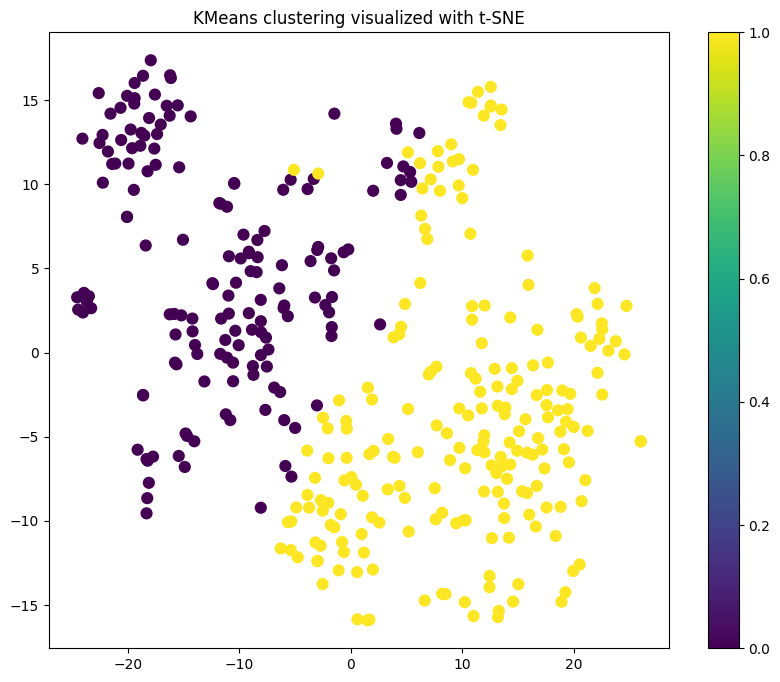

Cluster 0: [955397, 955420, 957973, 964298, 965126, 963240, 965931, 970807, 975775, 978558, 984216, 986539, 992082, 992105, 997234, 999442, 1000224, 1003858, 1003812, 1007055, 1007101, 1008343, 1015680, 1017359, 1021131, 1051353, 1051422, 1055838, 1058943, 1066533, 1074629, 1074514, 1086888, 1094064, 1095398, 1095421, 1104736, 1119847, 1139190, 1166629, 1182085, 1192205, 972900, 912180, 912318, 916274, 915699, 937710, 942632, 943690, 938906, 961676, 965517, 979984, 972739, 973130, 986194, 997786, 1004502, 1006112, 1010390, 1016899, 1026559, 1022166, 1034356, 1030354, 1050157, 1059702, 1060461, 1065406, 1054044, 1075342, 1058092, 1092017, 1073939, 1106921, 831841, 1019084, 845710, 849206, 873839, 878301, 887892, 892078, 953856, 942770, 960802, 963401, 961285, 968783, 981801, 987919, 992496, 996130, 989322, 982468, 1009355, 1006710, 1022235, 1024351, 1026490, 1033367, 1033206, 1041210, 1040313, 1046707, 1022212, 987505, 1010114, 891457, 898196, 899783, 900841, 908638, 914480, 915193, 915

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


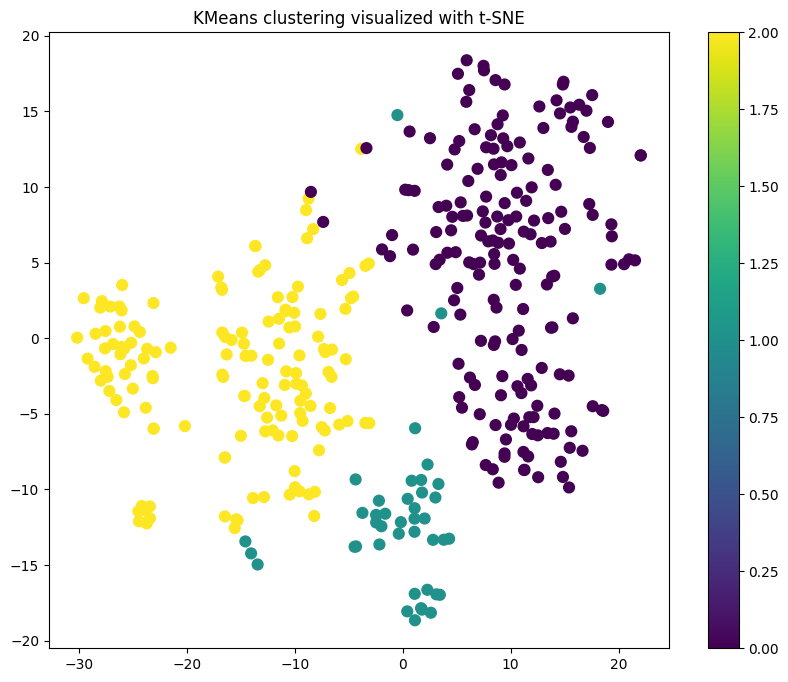

Cluster 0: [905073, 905257, 906430, 912157, 921863, 919632, 925635, 934651, 934605, 940930, 939090, 939136, 942701, 942448, 941344, 941988, 920115, 966345, 967932, 969197, 974487, 972348, 974464, 977615, 980145, 980766, 991875, 991415, 991461, 997809, 997464, 999925, 1003582, 1006825, 1006917, 1007124, 1010045, 996636, 1013564, 1017083, 1018348, 1022580, 1025432, 1019337, 1029227, 1029204, 1030883, 1035322, 1034885, 1037208, 1035138, 1060553, 1074123, 1083599, 1102643, 1083484, 1135441, 855048, 858107, 859257, 857509, 860453, 867008, 870481, 875656, 871401, 875311, 878163, 878623, 877956, 879796, 880394, 878692, 878761, 889272, 897207, 892952, 899415, 897667, 945277, 945254, 946933, 960434, 952614, 965701, 965977, 974694, 977592, 977040, 980260, 985941, 984952, 983342, 987068, 987689, 973360, 994520, 995049, 998913, 1000454, 1000109, 1006503, 1006733, 1014990, 1020073, 1021913, 1021085, 1026996, 1026881, 1026743, 1023224, 1031504, 1028928, 1033735, 1041394, 1053768, 891227, 895321, 891

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


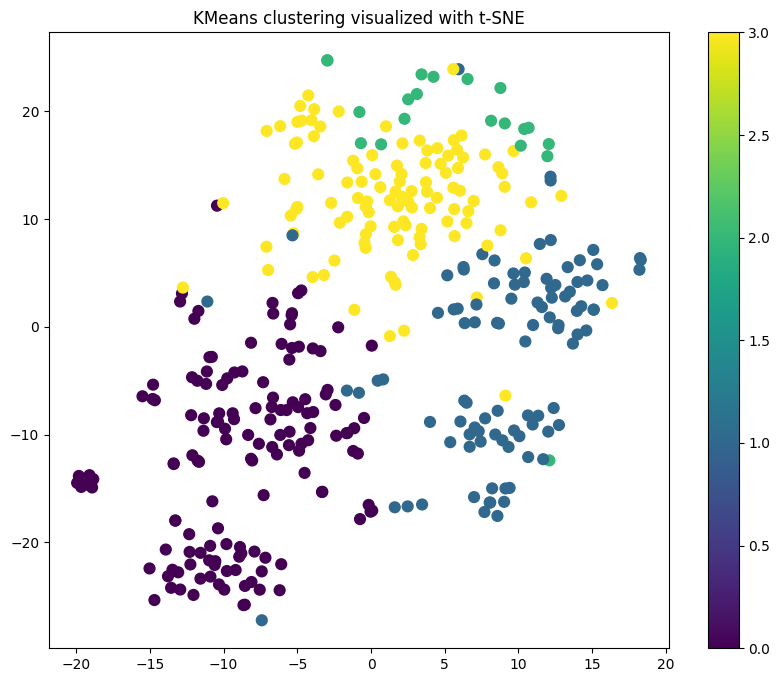

Cluster 0: [955397, 955420, 957973, 964298, 965126, 963240, 965931, 970807, 975775, 978558, 984216, 986539, 992082, 992105, 997234, 999442, 1000224, 1003812, 1007055, 1007101, 1017359, 1021131, 1051353, 1074629, 1095398, 1095421, 1104736, 1119847, 1139190, 972900, 912180, 912318, 916274, 915699, 937710, 942632, 943690, 938906, 961676, 965517, 979984, 972739, 973130, 986194, 997786, 1004502, 1006112, 1010390, 1016899, 1026559, 1022166, 1030354, 1050157, 1059702, 1060461, 1065406, 1054044, 1075342, 1058092, 1106921, 831841, 1019084, 845710, 849206, 873839, 878301, 887892, 892078, 953856, 942770, 960802, 963401, 961285, 968783, 981801, 987919, 992496, 996130, 989322, 982468, 1009355, 1006710, 1022235, 1024351, 1026490, 1033367, 1041210, 1040313, 1046707, 1022212, 987505, 1010114, 891457, 898196, 899783, 900841, 908638, 914480, 915193, 915630, 917815, 907005, 920828, 935640, 936238, 938055, 958847, 955236, 955857, 978581, 987160, 995647, 996176, 997372, 1000132, 1003973, 1008458, 1013794, 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


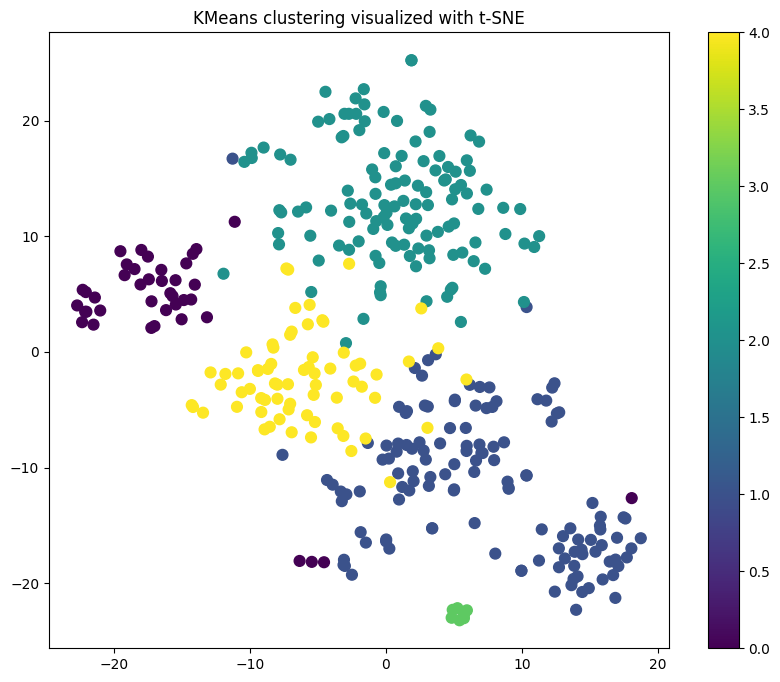

Cluster 0: [965954, 966092, 978420, 986953, 990863, 999419, 999580, 1003858, 1004663, 1007147, 1008343, 1010022, 1015680, 1015703, 1017290, 1025202, 1026605, 1027433, 1030423, 1030561, 1034333, 1051468, 1051376, 1051422, 1055815, 1055838, 1058943, 1058989, 1066533, 1074514, 1077918, 1086888, 1094064, 1095467, 1101010, 1111981, 1166629, 1182085, 1192205, 873908]
Cluster 1: [955397, 955420, 957973, 964298, 965126, 963240, 965931, 970807, 975775, 978558, 984216, 986539, 992082, 992105, 997234, 999442, 1000224, 1003812, 1007055, 1007101, 1017359, 1021131, 1051353, 1074629, 1095398, 1095421, 1104736, 1119847, 1139190, 912180, 912318, 916274, 915699, 937710, 942632, 943690, 938906, 961676, 965517, 979984, 972739, 973130, 986194, 997786, 1004502, 1006112, 1010390, 1016899, 1026559, 1022166, 1050157, 1059702, 1060461, 1065406, 1054044, 1075342, 1106921, 831841, 845710, 849206, 873839, 878301, 887892, 892078, 953856, 942770, 960802, 963401, 961285, 968783, 981801, 987919, 992496, 996130, 989322

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


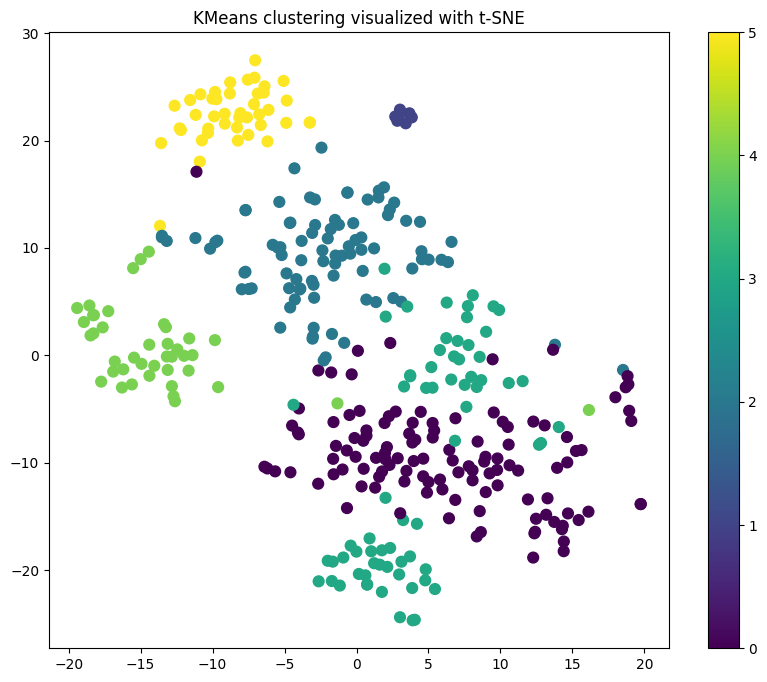

Cluster 0: [905073, 905257, 906430, 912157, 921863, 919632, 925635, 934651, 934605, 940930, 939090, 939136, 942701, 942448, 941344, 941988, 920115, 966345, 967932, 969197, 974487, 972348, 974464, 977615, 980145, 980766, 991415, 991461, 997464, 1006917, 1010045, 996636, 855048, 858107, 859257, 857509, 860453, 867008, 870481, 875656, 871401, 875311, 878163, 878623, 877956, 879796, 880394, 878692, 878761, 889272, 897207, 892952, 899415, 897667, 945277, 945254, 946933, 960434, 952614, 965701, 965977, 974694, 977592, 977040, 980260, 985941, 984952, 983342, 987689, 973360, 994520, 1026996, 1041394, 891227, 895321, 891940, 897575, 892515, 903141, 905027, 906476, 908661, 912134, 910754, 914457, 915998, 914503, 920575, 924117, 921909, 924416, 923956, 926808, 926969, 929867, 934237, 939527, 946588, 945783, 955282, 958341, 961331, 963585, 965632, 966230, 969450, 971520, 969680, 978144, 976856, 980697, 982583, 943966, 997280, 1002892, 1011149, 1015496, 1030308, 816799]
Cluster 1: [972900, 1019084,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


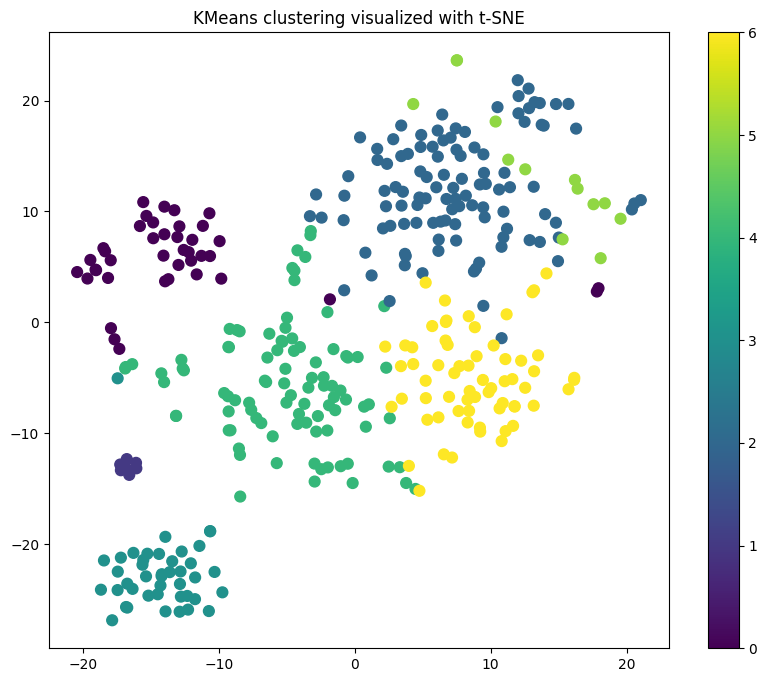

Cluster 0: [965954, 966092, 978420, 986953, 986562, 990863, 999419, 999580, 1002202, 1003858, 1004663, 1007147, 1008343, 1010022, 1015680, 1015703, 1017290, 1026605, 1027433, 1030423, 1030561, 1034333, 1051468, 1051376, 1051422, 1055815, 1055838, 1058943, 1058989, 1066533, 1074514, 1077918, 1086888, 1094064, 1095467, 1101010, 1111981, 1166629, 1182085, 1192205]
Cluster 1: [972900, 1019084, 1022212, 1010114, 909811, 955098, 955121]
Cluster 2: [905073, 905257, 906430, 912157, 921863, 919632, 925635, 934651, 934605, 940930, 939090, 942701, 942448, 941344, 941988, 967932, 974487, 972348, 977615, 980766, 991875, 991415, 991461, 997464, 1006917, 1010045, 996636, 855048, 858107, 859257, 860453, 870481, 875656, 871401, 875311, 878163, 878623, 877956, 879796, 880394, 878761, 889272, 897207, 892952, 899415, 897667, 945277, 945254, 946933, 960434, 952614, 965701, 965977, 974694, 977592, 977040, 980260, 985941, 984952, 983342, 973360, 994520, 1041394, 891227, 895321, 891940, 897575, 892515, 903141

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


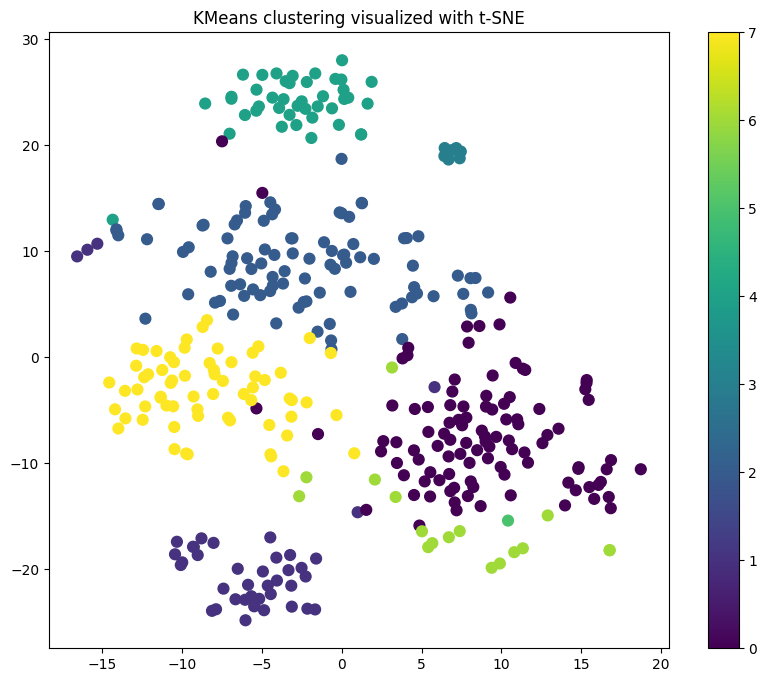

Cluster 0: [905073, 905257, 906430, 912157, 921863, 919632, 925635, 934651, 934605, 940930, 939090, 942701, 942448, 941344, 941988, 967932, 974487, 972348, 977615, 980766, 991875, 991415, 991461, 997464, 1006917, 1010045, 996636, 855048, 858107, 859257, 860453, 870481, 875656, 871401, 875311, 878163, 879796, 880394, 878761, 889272, 897207, 892952, 899415, 897667, 945277, 945254, 946933, 960434, 952614, 965701, 965977, 974694, 977592, 980260, 985941, 984952, 983342, 973360, 994520, 891227, 895321, 891940, 897575, 892515, 903141, 905027, 906476, 908661, 912134, 910754, 914457, 915998, 914503, 920575, 924117, 921909, 924416, 923956, 926808, 926969, 929867, 934237, 939527, 946588, 945783, 955282, 958341, 961331, 963585, 965632, 966230, 969450, 971520, 969680, 978144, 976856, 980697, 982583, 943966, 997280, 1002892, 816799]
Cluster 1: [965954, 966092, 978420, 986953, 986562, 990863, 999419, 999580, 1002202, 1003858, 1004663, 1007147, 1008343, 1010022, 1015680, 1015703, 1017290, 1026605, 102

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


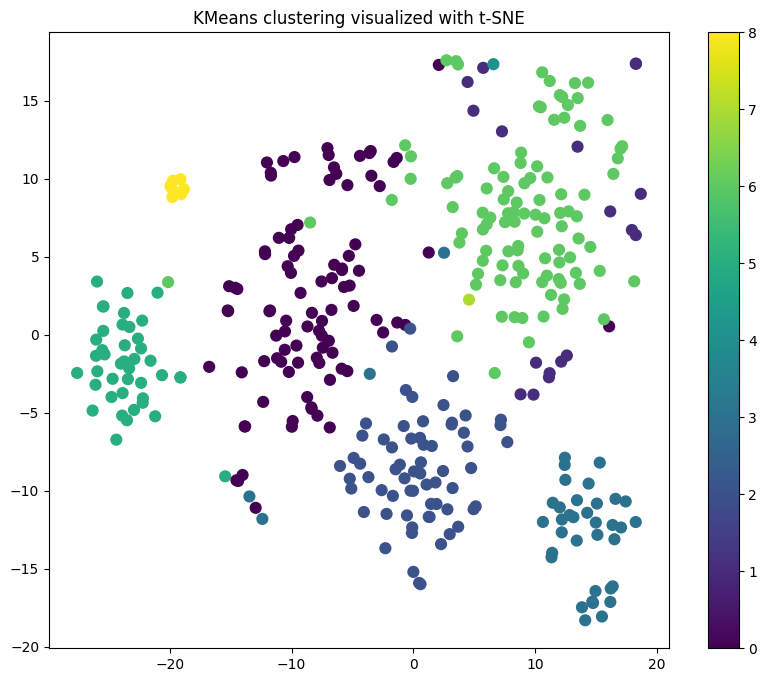

Cluster 0: [957973, 964298, 965126, 963240, 970807, 975775, 978558, 986539, 992082, 992105, 999442, 1000224, 1003812, 1007055, 1007101, 1017359, 1021131, 1051353, 1074629, 1094064, 1095398, 1095421, 1104736, 1119847, 1139190, 912180, 912318, 942632, 943690, 961676, 979984, 972739, 973130, 986194, 997786, 1004502, 1006112, 1010390, 1016899, 1026559, 1022166, 1030354, 1059702, 1060461, 1065406, 1054044, 1075342, 1058092, 1106921, 953856, 960802, 992496, 989322, 982468, 1009355, 1006710, 1022235, 1024351, 1026490, 1033367, 1041210, 1040313, 1046707, 898196, 899783, 908638, 914480, 915630, 917815, 907005, 935640, 936238, 938055, 955236, 955857, 978581, 987160, 995647, 996176, 997372, 1000132, 1003973, 1008458, 1013794, 1018325, 1024512, 1023707, 1031044, 1016554, 1033781, 1045350, 1043947, 1063497, 810359]
Cluster 1: [1025202, 939136, 920115, 966345, 969197, 974464, 980145, 999925, 857509, 867008, 878623, 877956, 878692, 977040, 987689, 1041394, 1011149, 1015496]
Cluster 2: [997809, 100358

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


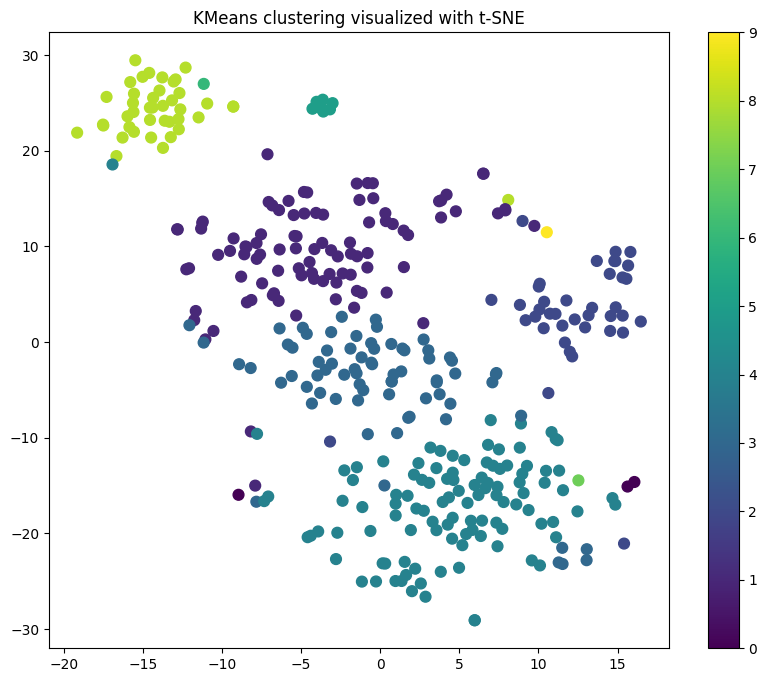

Cluster 0: [939136, 980145, 1026996]
Cluster 1: [957973, 964298, 965126, 963240, 970807, 975775, 978558, 986539, 992082, 992105, 999442, 1000224, 1003812, 1007055, 1007101, 1017359, 1021131, 1051353, 1074629, 1094064, 1095398, 1095421, 1104736, 1119847, 1139190, 912180, 912318, 942632, 943690, 961676, 979984, 972739, 973130, 986194, 997786, 1004502, 1006112, 1010390, 1016899, 1026559, 1022166, 1030354, 1059702, 1060461, 1065406, 1054044, 1075342, 1058092, 1106921, 953856, 960802, 992496, 989322, 982468, 1009355, 1006710, 1022235, 1024351, 1026490, 1033367, 1033206, 1041210, 1040313, 1046707, 898196, 899783, 908638, 914480, 915630, 917815, 907005, 935640, 936238, 938055, 955236, 955857, 978581, 987160, 995647, 996176, 997372, 1000132, 1003973, 1008458, 1013794, 1018325, 1024512, 1023707, 1031044, 1016554, 1033781, 1045350, 1043947, 1063497, 810359]
Cluster 2: [965954, 966092, 978420, 986953, 986562, 990863, 999419, 999580, 1002202, 1003858, 1004663, 1007147, 1008343, 1010022, 1015703, 1

In [28]:
cluser_results = {}

for i in range(2, 11):
    n_cluser = i
    print(n_cluser)
    cluser_results[i] = cluster_kmeans(i)

In [31]:
len(cluser_results.items())

9